<a href="https://colab.research.google.com/github/ppotatoo/Capstone-Predictive-Modeling-for-Increasing-Adoption-Probability/blob/master/data_analysis_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 참고
- https://m.blog.naver.com/tjdrud1323/221720259834
- https://techblog-history-younghunjo1.tistory.com/134
- https://plotly.com/python/pca-visualization/
- https://www.statology.org/scree-plot-python/

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns #시각화
from sklearn.preprocessing import StandardScaler # 차원 축소
from sklearn.decomposition import PCA #차원 축소
from sklearn.cluster import KMeans # 군집화 개수 정하기
import numpy as np 
import matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/캡스톤2_제주유기견/data_re.csv', encoding = 'CP949')
df.head()

,id,a1,a2,b1,b2,b3,b4,b5,b6,b7,...,c7,c8,c9,y,d1,d2,d3,d4,d5,d6
0,NaN,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,...,크기,성격,공고기간,입양희망여부,라프_취미,라프_성격,나이,성별,직업,⑧ 기타(구체적으로 명시)
1,1.0,1,1,2,3,4,2,2,5,4,...,3,2,4,1,4,1,61,1,3,NaN
2,2.0,1,1,4,5,4,4,5,4,4,...,4,4,4,2,1,2,26,1,3,NaN
3,3.0,1,1,2,4,4,2,2,4,4,...,3,2,3,2,3,1,46,1,3,NaN
4,4.0,1,2,3,2,2,3,2,2,2,...,3,4,4,3,3,1,53,2,6,NaN


In [4]:
data= df.copy()
ddata = data.drop(0, axis = 0)
dddata = ddata.drop('id', axis = 1)
p_data = dddata.drop('d6', axis = 1)
p_data.head()

,a1,a2,b1,b2,b3,b4,b5,b6,b7,c1,...,c6,c7,c8,c9,y,d1,d2,d3,d4,d5
1,1,1,2,3,4,2,2,5,4,2,...,4,3,2,4,1,4,1,61,1,3
2,1,1,4,5,4,4,5,4,4,1,...,3,4,4,4,2,1,2,26,1,3
3,1,1,2,4,4,2,2,4,4,1,...,3,3,2,3,2,3,1,46,1,3
4,1,2,3,2,2,3,2,2,2,2,...,4,3,4,4,3,3,1,53,2,6
5,1,2,3,2,2,3,3,4,4,2,...,4,3,3,3,2,2,1,41,2,2


In [5]:
# 표준화
pca_df = pd.DataFrame(data=p_data, columns=['a1','a2','b1','b2','b3','b4','b5','b6','b7', 'c1','c2','c3','c4','c5','c6','c7','c8','c9', 'y'])
# print('PCA사용데이터\n', pca_df.head())
x = pca_df.drop(['y'], axis=1).values # 독립변인들의 value값만 추출
y = pca_df['y'].values # 종속변인 추출
# print('x\n', x)
# print('y\n', y)
x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장
features = ['인식매체','경험','인식','관심도','지식','가족동의','환경','비용지불의사','정부지원정책','성별','중성화','나이','털길이','품종','색상','크기','성격','공고기간']

pd.DataFrame(x, columns=features).head()

,인식매체,경험,인식,관심도,지식,가족동의,환경,비용지불의사,정부지원정책,성별,중성화,나이,털길이,품종,색상,크기,성격,공고기간
0,-0.308043,-0.628768,-1.343083,-0.449464,0.967497,-1.121673,-0.708023,1.554655,0.279776,0.880425,0.320185,1.009290,1.126951,0.24119,0.662368,0.166080,-1.012322,0.941946
1,-0.308043,-0.628768,0.733850,1.410387,0.967497,0.737454,1.992064,0.662884,0.279776,-1.135815,0.320185,1.009290,-0.030875,0.24119,-0.549281,1.143019,1.271111,0.941946
2,-0.308043,-0.628768,-1.343083,0.480461,0.967497,-1.121673,-0.708023,0.662884,0.279776,-1.135815,0.320185,-0.216568,-0.030875,0.24119,-0.549281,0.166080,-1.012322,-0.240413
3,-0.308043,1.590412,-0.304617,-1.379389,-1.128164,-0.192110,-0.708023,-1.120660,-1.718626,0.880425,0.320185,1.009290,1.126951,0.24119,0.662368,0.166080,1.271111,0.941946
4,-0.308043,1.590412,-0.304617,-1.379389,-1.128164,-0.192110,0.192006,0.662884,0.279776,0.880425,0.320185,-0.216568,-0.030875,0.24119,0.662368,0.166080,0.129395,-0.240413


In [6]:
pca = PCA(n_components=18)
pca_array = pca.fit_transform(x)
PCA_df = pd.DataFrame(pca_array, index=pca_df.index,
                      columns=[f"pca{num+1}" for num in range(x.shape[1])])
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(x.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result
# 고윳값이 0.7이상, 누적기여율이 0.8을 넘어가는 지점


,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,6.353291,0.351784,0.351784
pca2,1.829075,0.101277,0.453061
pca3,1.276151,0.070661,0.523722
pca4,1.059217,0.058649,0.582371
pca5,0.999989,0.055370,0.637741
pca6,0.894939,0.049553,0.687294
pca7,0.829725,0.045942,0.733236
pca8,0.744801,0.041240,0.774476
pca9,0.613855,0.033989,0.808465
pca10,0.545282,0.030192,0.838658


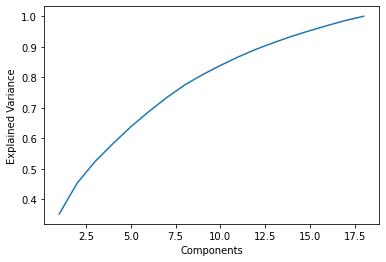

In [15]:
pca = PCA()
pca.fit(pca_array)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

x=range(1, exp_var_cumul.shape[0] + 1)
y=exp_var_cumul
#누적기여율
plt.plot(x,y)
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.show()

In [14]:
import plotly.express as px
pca = PCA()
pca.fit(pca_array)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "Components", "y": "Explained Variance"})